In [1]:
# Importing Libraries.
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

In [2]:
# Assigning Constants.
mass = 1
hbar = 1
omega = 1
Lambda = 1


In [3]:
# Defining the axis.
N = 1000
x_range = 5
x = np.linspace(-x_range,x_range,N)
dx = x[1]-x[0]

In [4]:
# Defining the Derivative operator.
derivative_operator = (np.eye(N,k=1)+np.eye(N,k=-1)-2*np.eye(N))/(dx**2)

In [5]:
# Defining the potential and kinetic operator and getting the hamiltonian.
KE = -((hbar**2)/(2*mass))*derivative_operator
PE = np.diag((0.5*mass*(omega**2)*(x)**2) + (Lambda*(x)**4))
H = KE + PE 

In [6]:
# Soliving the eigenvalue problem to get the eigenstates and eigenvalues.
energy, wavefunction = eigh(H)

In [7]:
# Normalizing the wavefunctions.
def normalize(p):
    return p/np.sqrt(np.sum(np.abs(p)**2)*dx)

Psis = [normalize(wavefunction[:, n]) for n in range(4)]

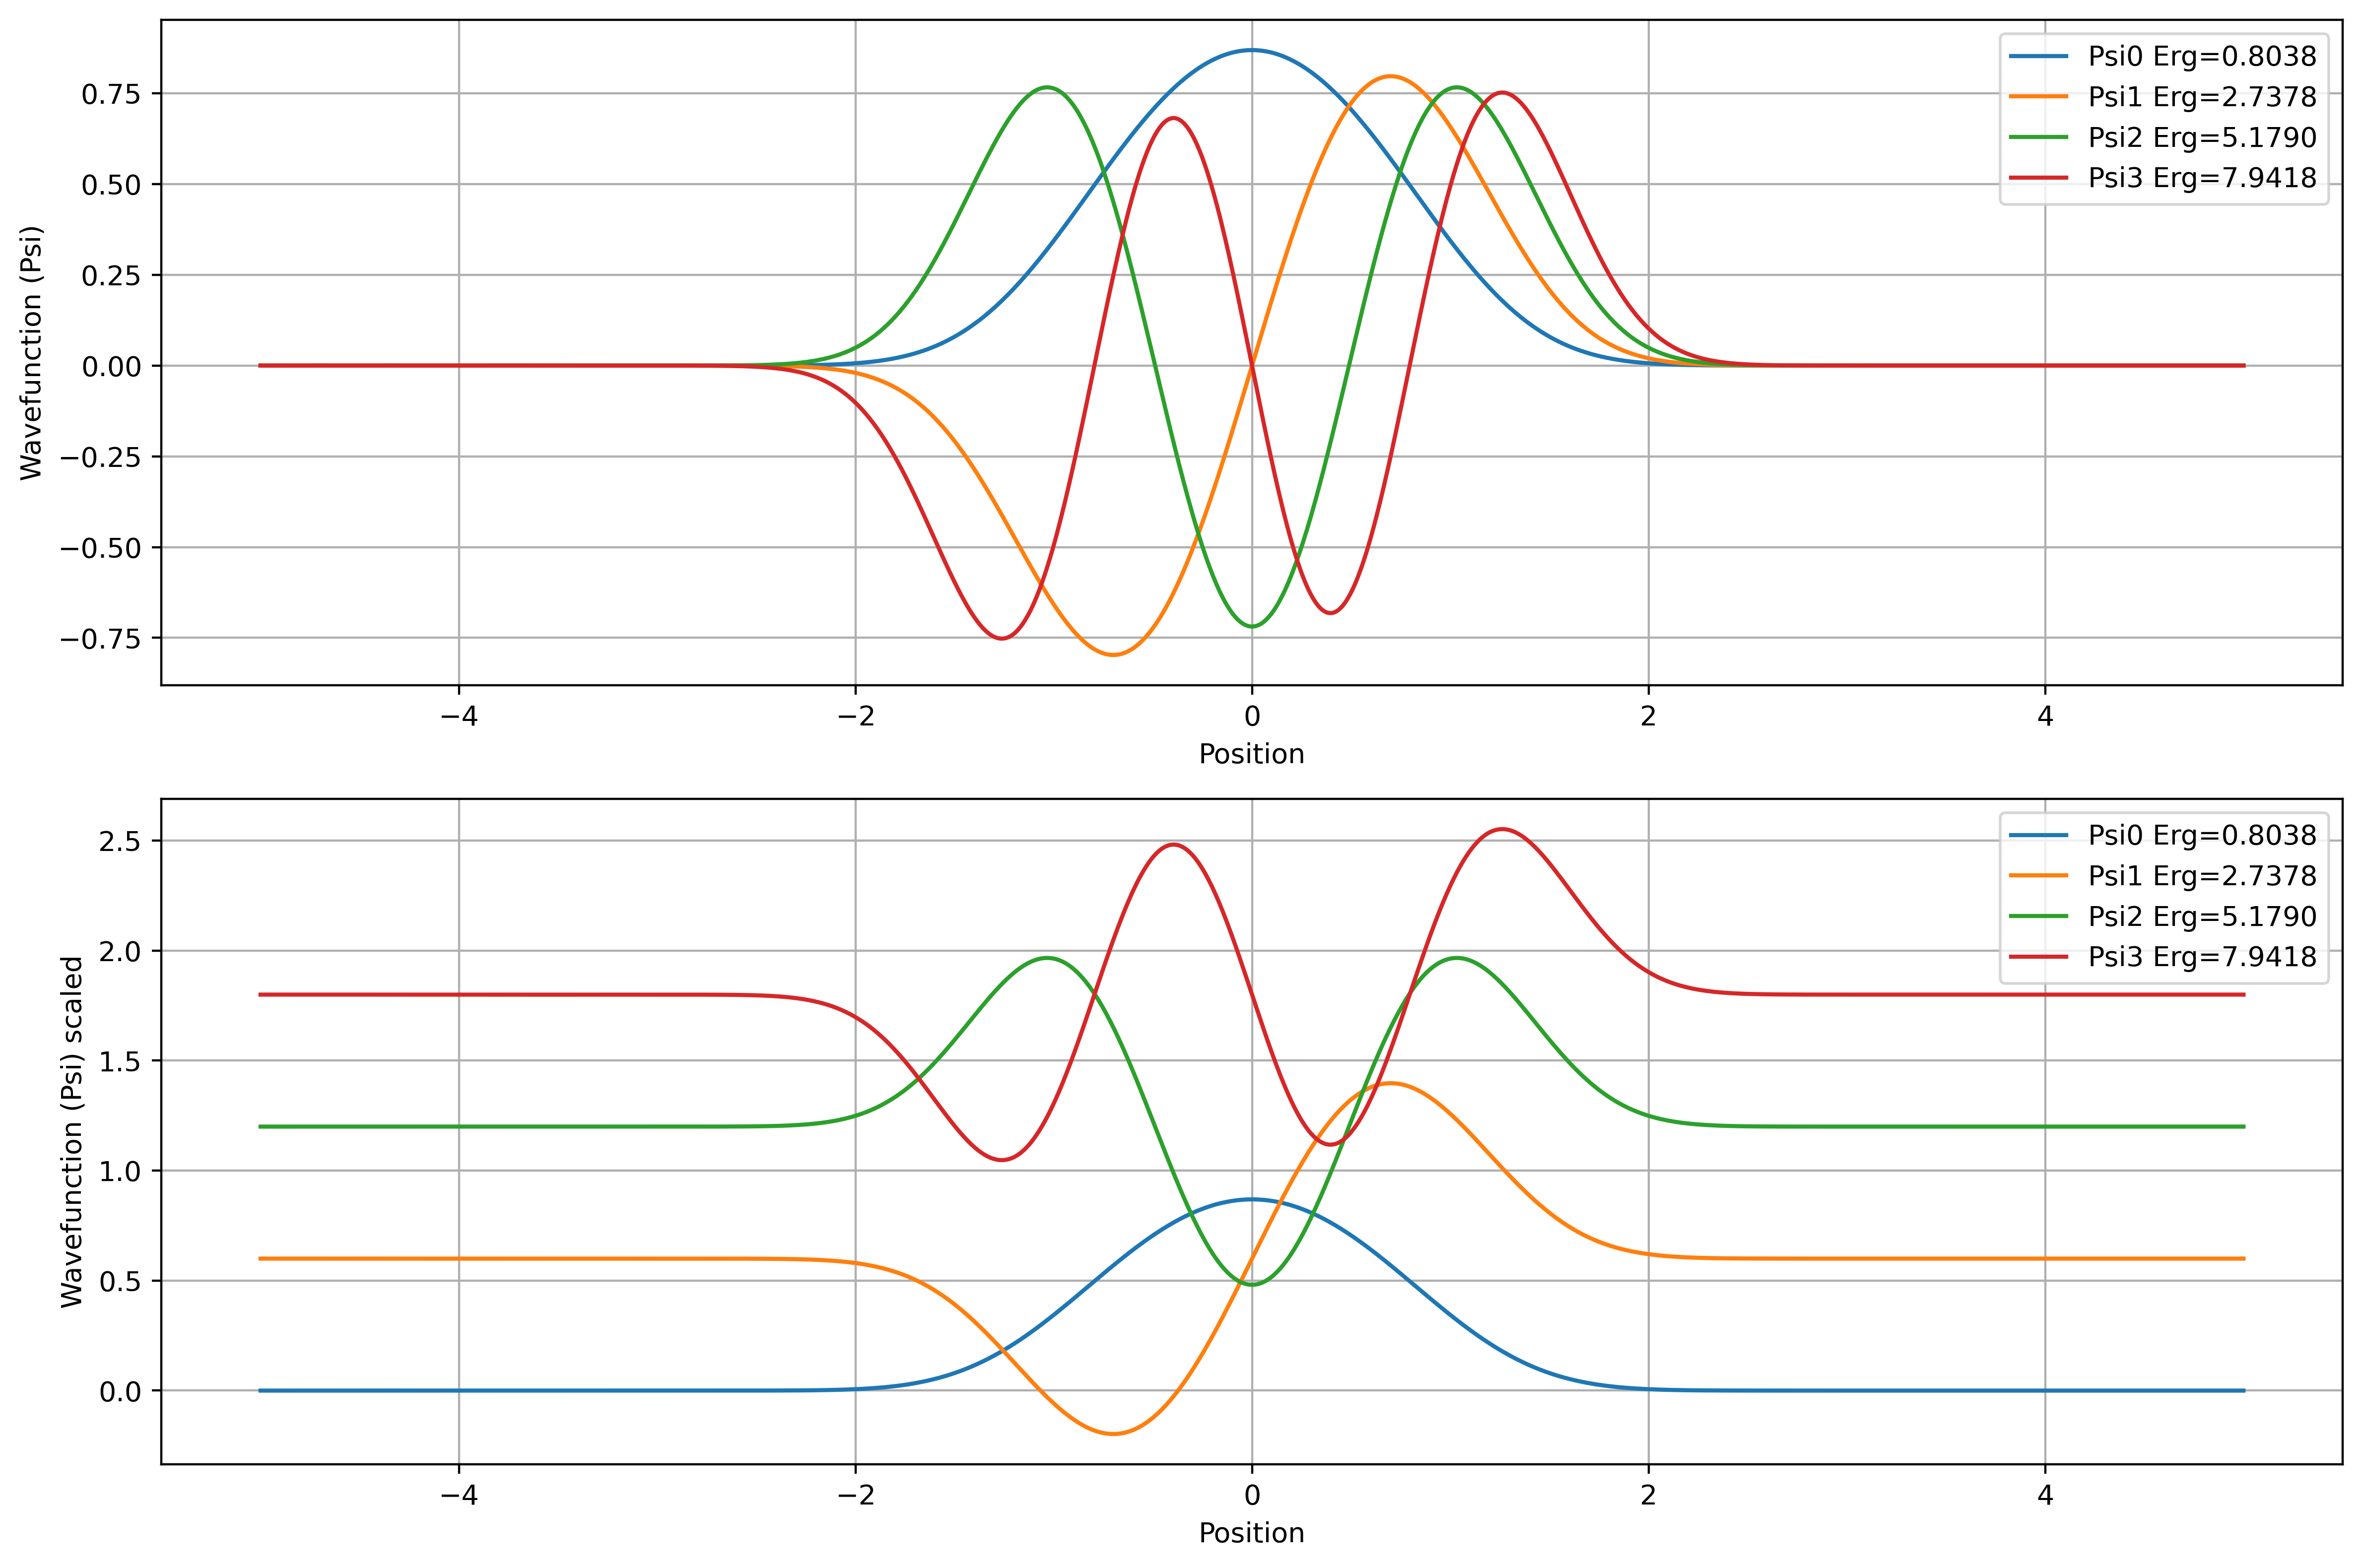

In [28]:
# Plotting the wavefunctions.
fig, ax = plt.subplots(2,1, figsize=(12,8), dpi=400)

for n,Psi in enumerate(Psis):
    ax[0].plot(x, Psi, label = f"Psi{n} Erg={energy[n]:.4f}")
    ax[1].plot(x, Psi+0.6*n, label = f"Psi{n} Erg={energy[n]:.4f}")

ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("Position")
ax[0].set_ylabel("Wavefunction (Psi)")

ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("Position")
ax[1].set_ylabel("Wavefunction (Psi) scaled")

plt.tight_layout()
plt.savefig("Results/figures/eigenstates.png")
plt.show()

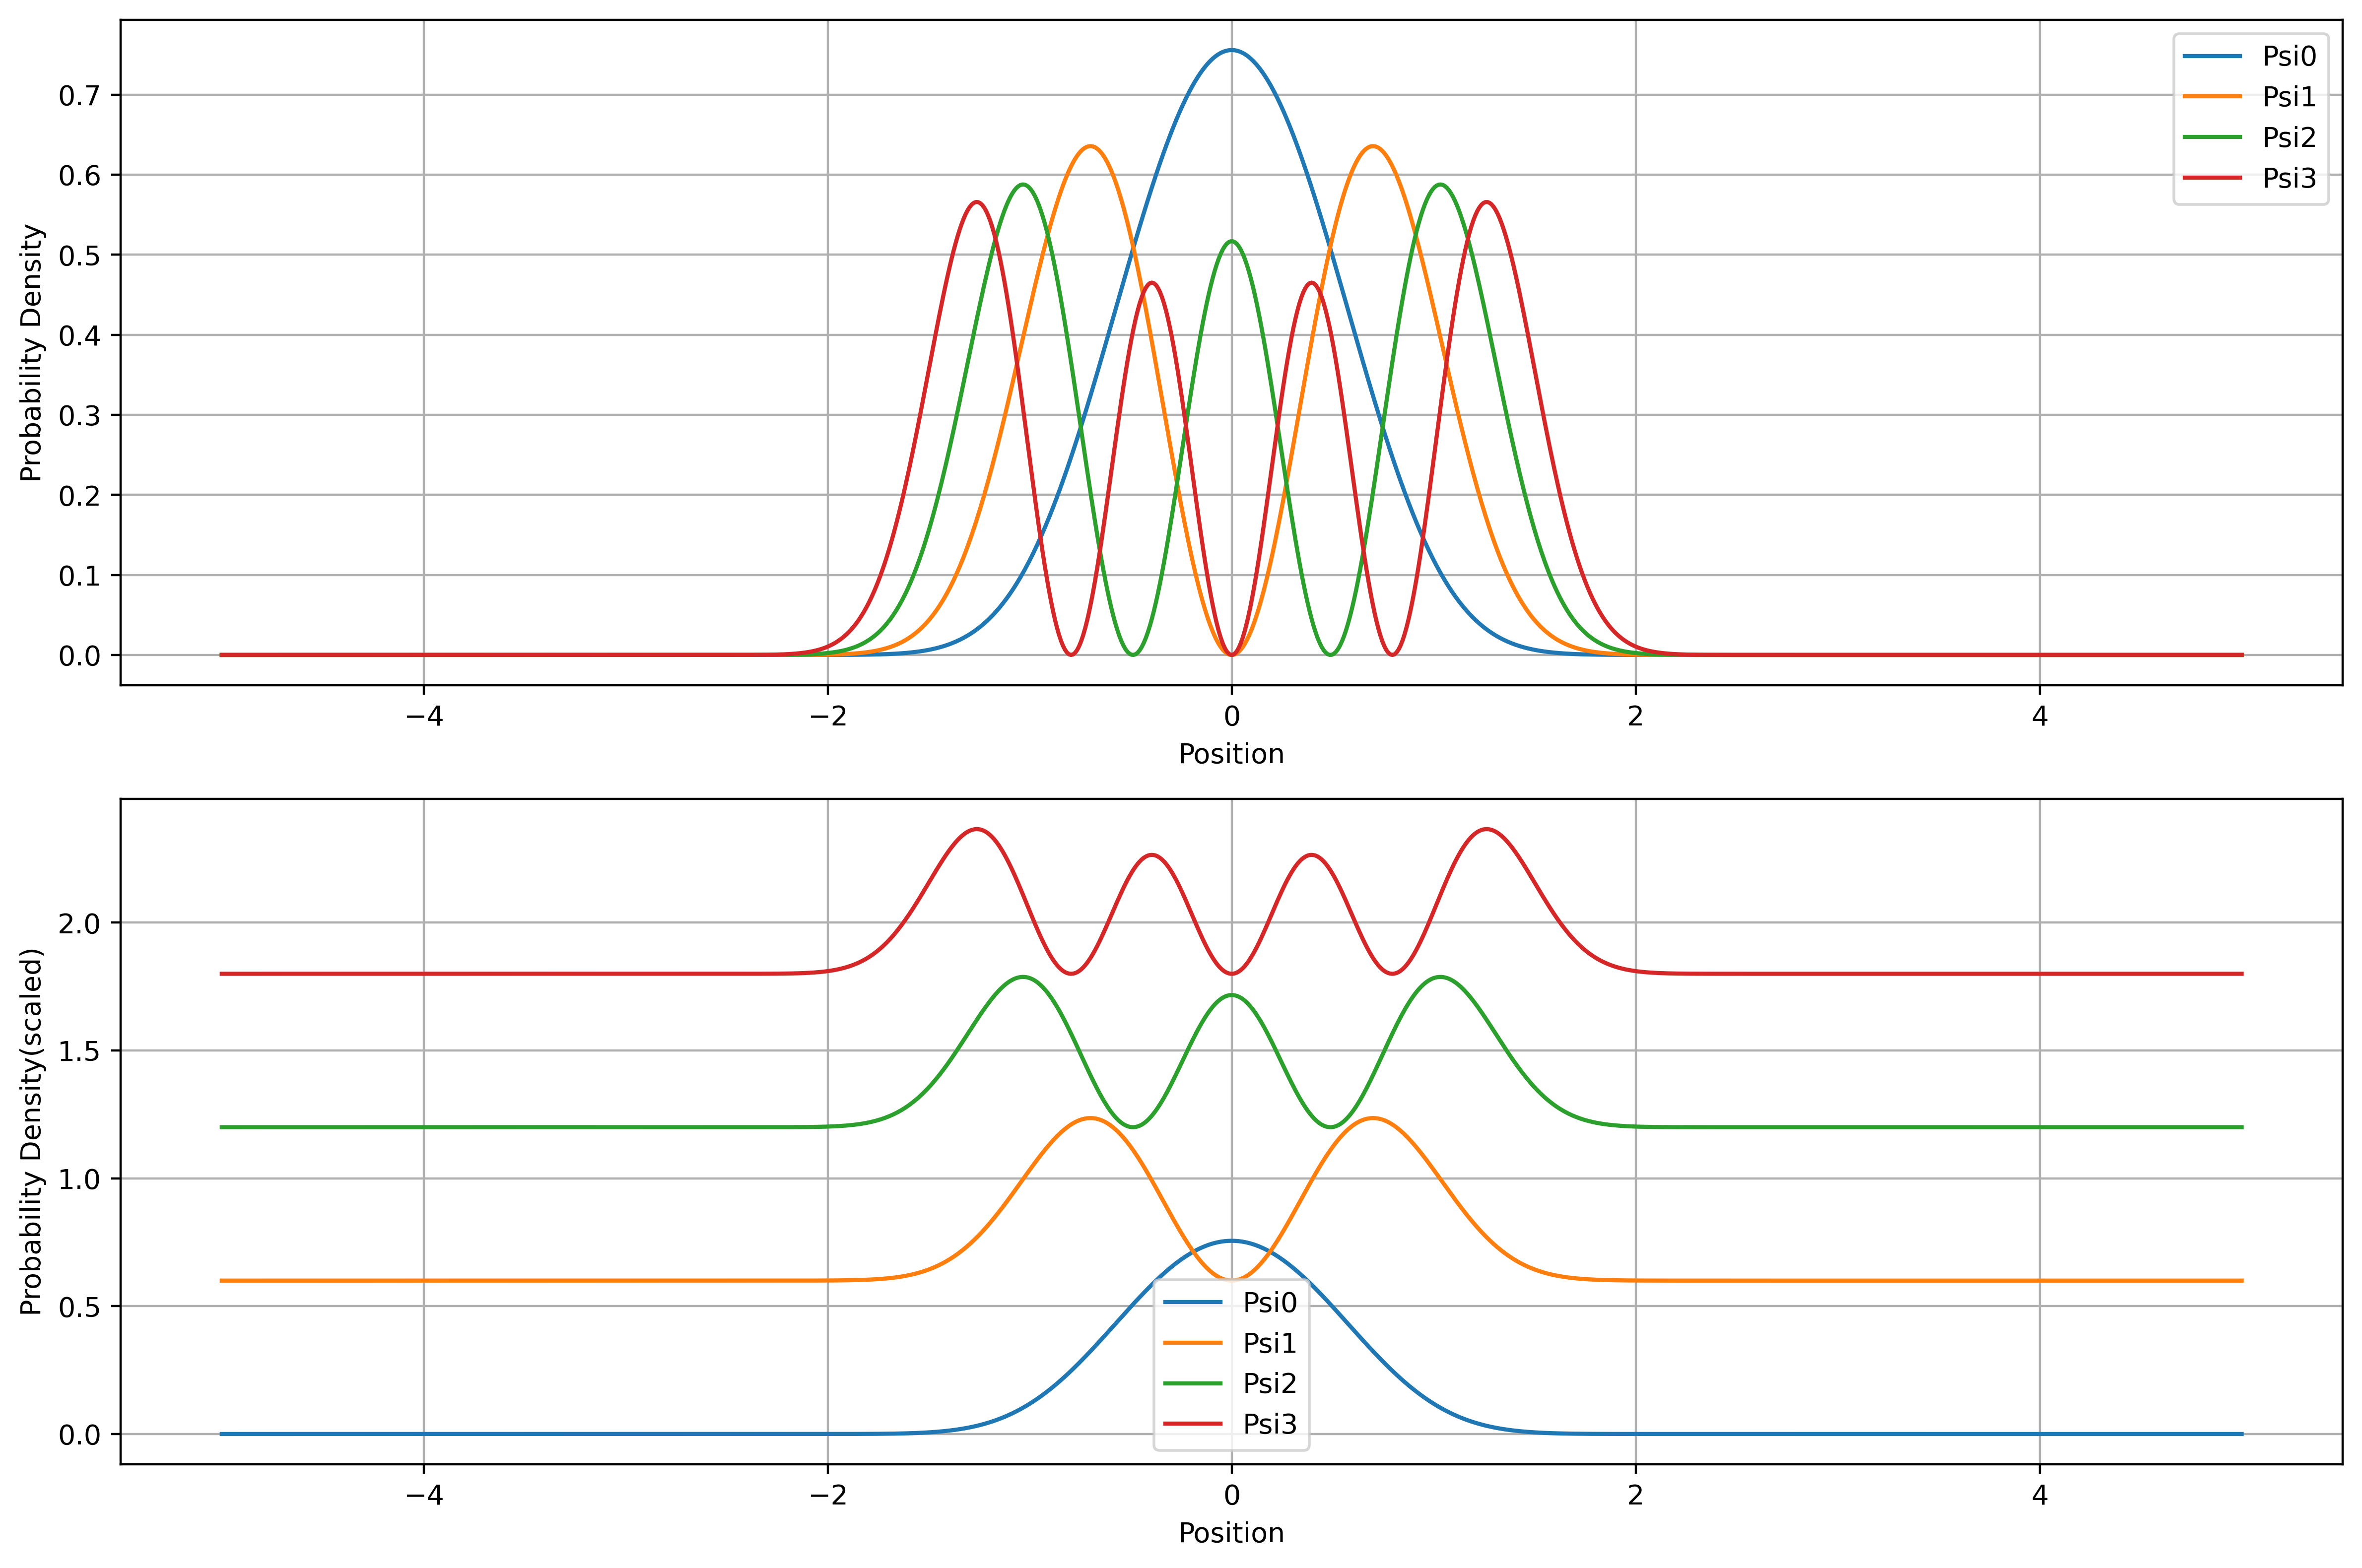

In [26]:
# Plotting the probability density.
fig, ax = plt.subplots(2,1, figsize=(12,8),dpi = 400)
for n, psi in enumerate(Psis):
    ax[0].plot(x, psi**2, label = (f"Psi{n}"))
    ax[1].plot(x, psi**2+ 0.6*n, label = (f"Psi{n}"))
    
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel("Position")
ax[0].set_ylabel("Probability Density")

ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("Position")
ax[1].set_ylabel("Probability Density(scaled)")

plt.tight_layout()
plt.savefig("Results/figures/probability_density.png")
plt.show()
